In [1]:
import sys
import os
import warnings
warnings.filterwarnings('ignore')

sys.path.append(os.path.abspath('..'))

import tools as f

In [2]:
f.set_runtime(
    g_start_time='2023-02-14',
    g_end_time='2023-03-01',
    g_time_granularity='1h',
    g_matrix_cache_folder='test-cache',
    g_data_folder = 'data',
    g_blow_cache = False,
    g_debug_mode = True,
    g_universe_num = 1,
    g_use_cache=False
)

In [4]:
mx = f.Prices('c')

Fetching data between 2023-02-14 and 2023-03-01
ohlcv_df: timestamp
2023-02-14 13:00:00-05:00    4133.75
2023-02-14 14:00:00-05:00    4140.81
2023-02-14 15:00:00-05:00    4136.03
2023-02-14 16:00:00-05:00    4136.13
2023-02-15 09:00:00-05:00    4111.45
                              ...   
2023-02-28 12:00:00-05:00    3993.90
2023-02-28 13:00:00-05:00    3994.40
2023-02-28 14:00:00-05:00    3983.17
2023-02-28 15:00:00-05:00    3969.28
2023-02-28 16:00:00-05:00    3970.15
Name: c, Length: 76, dtype: float64
aligned_df:                        I:SPX
timestamp                   
2023-02-14 13:00:00  4133.75
2023-02-14 14:00:00  4140.81
2023-02-14 15:00:00  4136.03
2023-02-14 16:00:00  4136.13
2023-02-15 09:00:00  4111.45
2023-02-15 10:00:00  4115.18
2023-02-15 11:00:00  4129.67
2023-02-15 12:00:00  4123.20
2023-02-15 13:00:00  4137.70
2023-02-15 14:00:00  4132.23
2023-02-15 15:00:00  4147.48
2023-02-15 16:00:00  4147.60
2023-02-16 09:00:00  4096.69
2023-02-16 10:00:00  4121.18
2023-02-16 11

<Axes: xlabel='timestamp'>

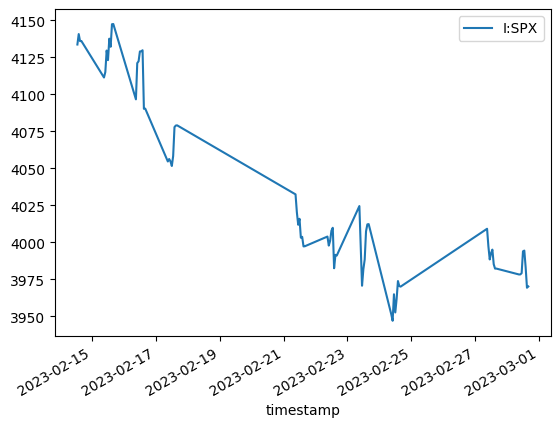

In [6]:
mx.plot()

In [5]:
mx.dropna()

                       I:SPX
2023-02-14 13:00:00  4133.75
2023-02-14 14:00:00  4140.81
2023-02-14 15:00:00  4136.03
2023-02-14 16:00:00  4136.13
2023-02-14 17:00:00  4136.13
...                      ...
2023-02-28 20:00:00  3970.15
2023-02-28 21:00:00  3970.15
2023-02-28 22:00:00  3970.15
2023-02-28 23:00:00  3970.15
2023-03-01 00:00:00  3970.15

[348 rows x 1 columns]

<Axes: >

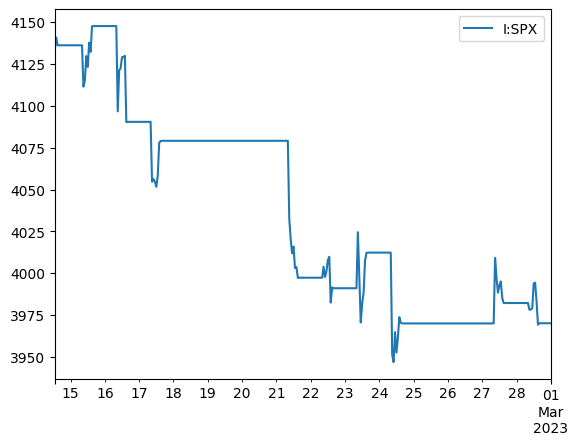

In [6]:
mx.dropna().plot()

In [7]:
import matplotlib.pyplot as plt

def plot_continuous_non_nan(matrix, column='I:SPX'):
    """
    Plot non-NaN values from the specified column of a PolygonDataMatrix's underlying_df continuously,
    ignoring temporal gaps.

    Args:
        matrix (PolygonDataMatrix): The matrix object containing underlying_df.
        column (str): The column to plot (default: 'I:SPX').

    Returns:
        matplotlib.figure.Figure: The generated figure.
    """
    # Extract non-NaN data
    non_nan_df = matrix.underlying_df[[column]].dropna()
    
    if non_nan_df.empty:
        print("No non-NaN data to plot.")
        return None

    # Create a continuous integer index for plotting
    x = range(len(non_nan_df))
    y = non_nan_df[column]

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(x, y, '-o', label=column, markersize=3)
    
    # Customize the plot
    ax.set_title(f"Continuous {column} Prices (Non-NaN Values)")
    ax.set_xlabel("Data Point Index")
    ax.set_ylabel("Price")
    ax.legend()
    
    # Optionally, set x-ticks to show key timestamps
    num_ticks = min(10, len(non_nan_df))  # Show up to 10 ticks
    tick_indices = [int(i * (len(non_nan_df) - 1) / (num_ticks - 1)) for i in range(num_ticks)]
    tick_labels = [non_nan_df.index[i].strftime('%Y-%m-%d %H:%M') for i in tick_indices]
    ax.set_xticks(tick_indices)
    ax.set_xticklabels(tick_labels, rotation=45)
    
    plt.tight_layout()
    return fig

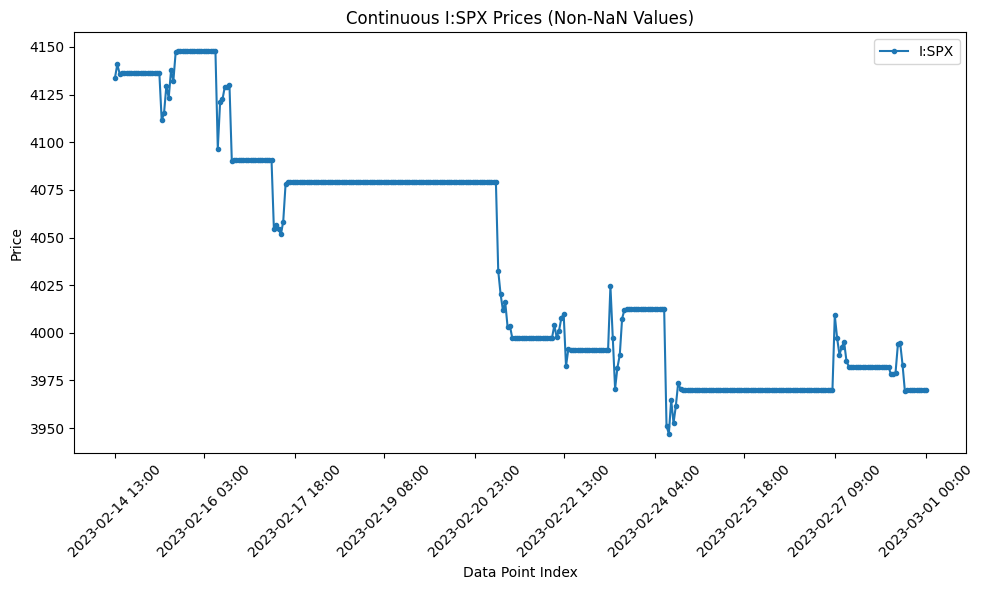

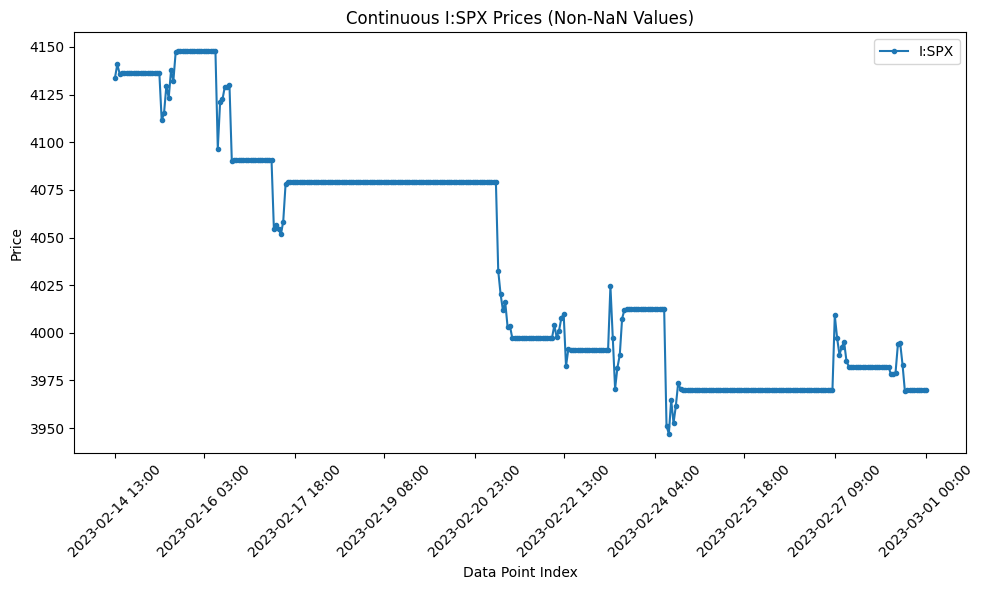

In [11]:
plot_continuous_non_nan(mx, column='I:SPX')